![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World!

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

Explore the `crimes.csv` dataset and use your findings to answer the following questions:
- Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour`.
- Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called `peak_night_crime_location`.
- Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called `victim_ages`, with age group labels `"0-17"`,` "18-25"`, `"26-34"`, `"35-44"`, `"45-54"`, `"55-64"`, and "65+" as the index and the frequency of crimes as the values.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset into a pandas DataFrame called `crimes`.
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})

# Display the first 5 rows of the DataFrame.
display(crimes.head())

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27.0,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60.0,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28.0,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37.0,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79.0,M,B,NaN,Invest Cont,1200 W 7TH ST


## 1. Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour`.

In [8]:
# Extract the hour that each crime was committed using the .str attribute and
# store the results in a new column "HOUR OCC"
# errors='coerce' will replace invalid parsing with NaN
crimes['HOUR OCC'] = pd.to_numeric(crimes['TIME OCC'].str[0:2], errors='coerce').astype('Int64')
peak_crime_hour = crimes['HOUR OCC'].value_counts().index[0]

# Print the peak crime hour
print(peak_crime_hour)

12


## 2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called `peak_night_crime_location`.

In [11]:
# Create a new DataFrame by using boolean indexing along with the .isin() method,
# pass a list of hours to retain in the new DataFrame.
night_crimes = \
crimes[crimes['HOUR OCC'].isin([22, 23, 0, 1, 2, 3])]

# Use the .groupby() on "AREA NAME", then count the number of crime occurrences
# per hour and sort these results in descending order by using the .sort_values() method with ascending=False.
peak_night_crime_location = \
night_crimes.groupby('AREA NAME')['HOUR OCC'].count().sort_values(ascending = False).index[0]

print(f'{peak_night_crime_location} is the Area with the largest frequency of night crimes')

Central is the Area with the largest frequency of night crimes


## 3. Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called `victim_ages`, with age group labels `"0-17"`,` "18-25"`, `"26-34"`, `"35-44"`, `"45-54"`, `"55-64"`, and "65+" as the index and the frequency of crimes as the values.

Age Bracket
26-34    18127
35-44    16360
45-54    10853
18-25    10742
55-64     7827
65+       5589
0-17      1729
Name: count, dtype: int64


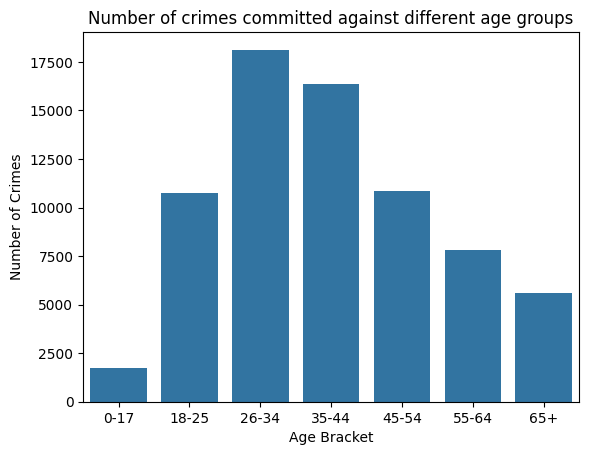

In [15]:
# Segregate the "Vict Age" column by creating a list of values to pass to the
# bins and labels argument of the pd.cut() function.
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Assign a new column, "Age Bracket", to crimes by using the pd.cut() function,
# passing the "Vict Age" column, assigning the age_bins list to the bins keyword
# argument and age_labels to the labels keyword argument.
crimes['Age Bracket'] = \
pd.cut(crimes['Vict Age'], bins = age_bins, labels = age_labels)

# Create victim_ages by using the .value_counts() method on 'Age Bracket' column as Series.
victim_ages = crimes['Age Bracket'].value_counts()


# print count of crimes by age group
print(victim_ages)

# Plot the number of crimes committed against victims of different age groups.
sns.countplot(x = 'Age Bracket', data = crimes)
plt.xlabel('Age Bracket')
plt.ylabel('Number of Crimes')
plt.title('Number of crimes committed against different age groups')
plt.show()

### 🔍 **Insights**
My analysis shows that the "Central" area of Los Angeles has the largest frequency of night crimes, usually in the midnight hour and most of these crimes are committed against victims of ages between (26 and 34)years.